In [195]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as mlines

In [4]:
video_cap = cv2.VideoCapture('input.mp4')
success, frame = video_cap.read()
count = 0
while success:
    cv2.imwrite('frames/'+ str(count)+'.jpg', frame)
    success, frame = video_cap.read()
    count += 1

In [5]:
def canny_edge(frame_name):
    frame = cv2.imread(frame_name)
    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    canny = cv2.Canny(blur, 50, 150)
    return canny
    

In [6]:
a = canny_edge('frames/1.jpg')

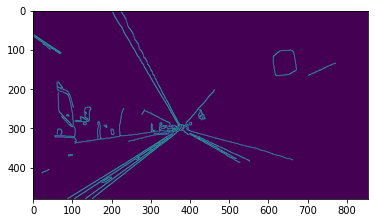

In [7]:
plt.imshow(a)

In [8]:
height, width = a.shape

In [9]:
height, width

(480, 854)

In [10]:
np.array([[(0, height), (800, height), (380, 290)]])

array([[[  0, 480],
        [800, 480],
        [380, 290]]])

In [15]:
def segment(frame_name):
    # Since an image is a multi-directional array containing the relative intensities of each pixel in the image, we can use frame.shape to return a tuple: [number of rows, number of columns, number of channels] of the dimensions of the frame
    # frame.shape[0] give us the number of rows of pixels the frame has. Since height begins from 0 at the top, the y-coordinate of the bottom of the frame is its height
    frame = cv2.imread(frame_name)
    height = frame.shape[0]
    # Creates a triangular polygon for the mask defined by three (x, y) coordinates
    polygons = np.array([
                            [(0, height), (800, height), (380, 290)]
                        ])
    # Creates an image filled with zero intensities with the same dimensions as the frame
    mask = np.zeros_like(frame)
    # Allows the mask to be filled with values of 1 and the other areas to be filled with values of 0
    cv2.fillPoly(mask, polygons, 200) # the third value if the number of points
    # A bitwise and operation between the mask and frame keeps only the triangular area of the frame
    segment = cv2.bitwise_and(frame, mask)
    return segment

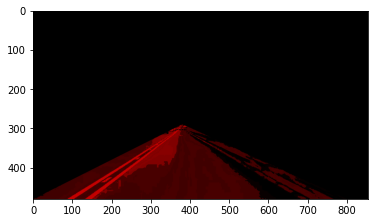

In [16]:
segm = segment('frames/1.jpg')
plt.imshow(segm)

In [26]:
ret, thresh = cv2.threshold(segm, 130, 145, cv2.THRESH_BINARY)


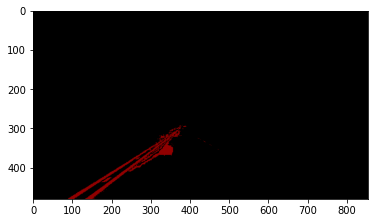

In [27]:
plt.imshow(thresh)

In [33]:
th= cv2.cvtColor(thresh, cv2.COLOR_BGR2GRAY)
seg= cv2.cvtColor(segm, cv2.COLOR_BGR2GRAY)

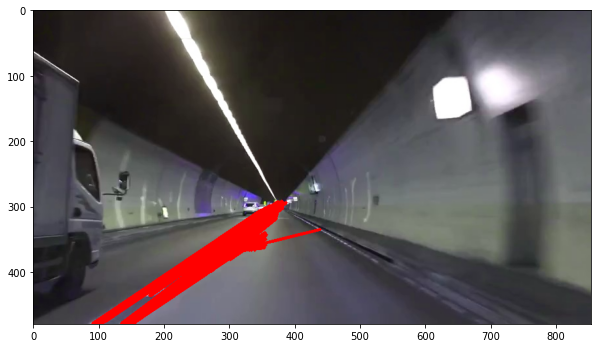

In [35]:
lines = cv2.HoughLinesP(th, 1, np.pi/180, 30, maxLineGap=200)

# create a copy of the original frame
dmy = cv2.imread('frames/1.jpg')

# draw Hough lines
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(dmy, (x1, y1), (x2, y2), (255, 0, 0), 3)

# plot frame
plt.figure(figsize=(10,10))
plt.imshow(dmy, cmap= "gray")
plt.show()

## Using Hough transform for line detection

In [102]:
def get_img(path):
    img = cv2.imread(path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_blur = cv2.GaussianBlur(img_gray, (5,5), 0)
    edges = cv2.Canny(img_blur,50, 150, apertureSize=3)
    return edges

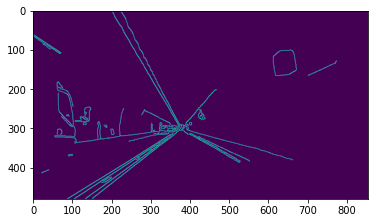

In [196]:
img = get_img('frames/1.jpg')
plt.imshow(img)


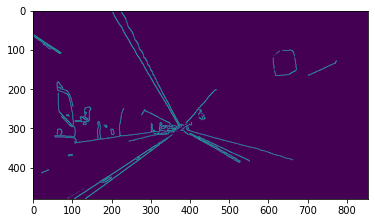

In [104]:
img2 = img.copy()
lines = cv2.HoughLines(img2, 1, np.pi/180,250 )
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img2,(x1,y1),(x2,y2),(0,0,255),2)
plt.imshow(img2)

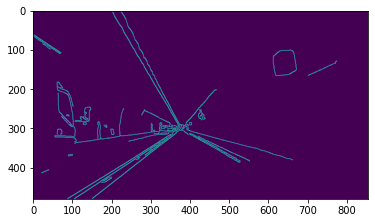

In [204]:
img3 = img.copy()
minLineLength = 1500
maxLineGap = 100
#minLineLength - Minimum length of line. Line segments shorter than this are rejected.
#maxLineGap - Maximum allowed gap between line segments to treat them as single line.
lines2 = cv2.HoughLinesP(img3, 1, np.pi/180,100,minLineLength,maxLineGap)
for x1,y1,x2,y2 in lines2[0]:
    cv2.line(img3,(x1,y1),(x2,y2),(0,0,255),2)
plt.imshow(img3)

## Harris corner detection

In [ ]:
img = cv2.imread('frames/1.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
dst = cv2.cornerHarris(img_gray, 2, 3, 0.04)
dst = cv2.dilate(dst, None)

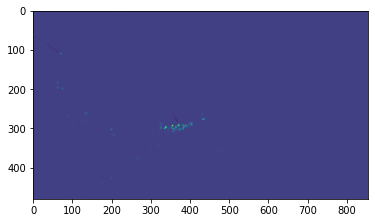

In [131]:
plt.imshow(dst)

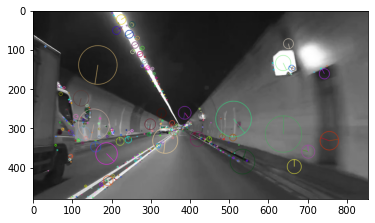

In [137]:
sift = cv2.SIFT_create()
#kp = sift.detect(img_gray, None)
kp, dst = sift.detectAndCompute(img_gray, None)
kp_img = cv2.drawKeypoints(img_gray, kp, img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(kp_img)

In [143]:
surf = cv2.xfeatures2d.SURF_create(400)
kp, des = surf.detectAndCompute(img,None)

plt.imshow(des)

AttributeError: module 'cv2.cv2' has no attribute 'SURF_create'

In [144]:
orb = cv2.OBR_create()
kp = orb.detect(img, None)

kp, des = obr.compute(img, kp)

img_orb = cv2.drawKeypoints(img, kp, color=(0,255,0), flags=0)
plt.imshow(img_orb)




AttributeError: module 'cv2.cv2' has no attribute 'OBR_create'

## Hough line detection from scratch 

In [159]:
import seaborn as sns

In [187]:
path = 'frames/1.jpg'
num_thetas = 180
num_rhos = 180

img = cv2.imread(path)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(img_gray, 50, 150)

edges_height, edges_width = edges.shape[:2]
edges_half_height, edges_half_width = edges_height//2, edges_width//2

d =np.sqrt(np.square(edges_height) + np.square(edges_width))
drho = 2*d / num_rhos #because it's from -d to d and we want num_rhos
dtheta = 180 / num_thetas

thetas = np.arange(0, 180, dtheta)
rhos = np.arange(-d, d, dtheta)

cos_thetas = np.cos(np.deg2rad(thetas))
sin_thetas = np.sin(np.deg2rad(thetas))

accumulator = np.zeros((len(rhos), len(thetas)))

# fig, axs = plt.subplots(1, 3, figsize=(12,12))
# axs.flat[0].imshow(img)
# axs.flat[1].imshow(img_gray, cmap='gray')
# axs.flat[2].imshow(edges)
                   
edge_points = np.argwhere(edges!=0)
#edge_points = edge_points - np.array([[edges_half_height, edges_half_width]])
rhos_values = np.matmul(edge_points, np.array([cos_thetas, sin_thetas])) 

In [192]:
accumulator.shape

(1960, 180)

In [194]:
rhos_values.shape

(8562, 180)

In [186]:
np.array([[edges_half_height, edges_half_width]])

array([[240, 427]])

In [191]:
edge_points[0]

array([-240, -225])